In [ ]:
!git clone https://github.com/MJaiman/ML

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')


Data Collection and Analysis

In [ ]:
insurance_dataset = pd.read_csv('/content/ML/insurance.csv')

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#checking no. of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features like SEX, Smoker, Region

In [ ]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


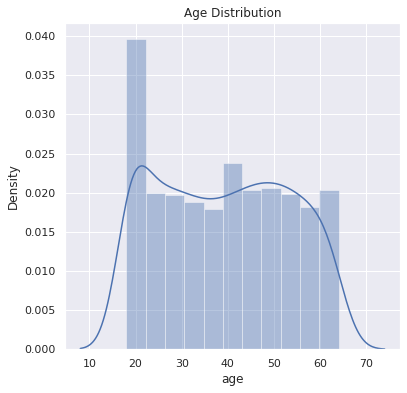

In [ ]:
#Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

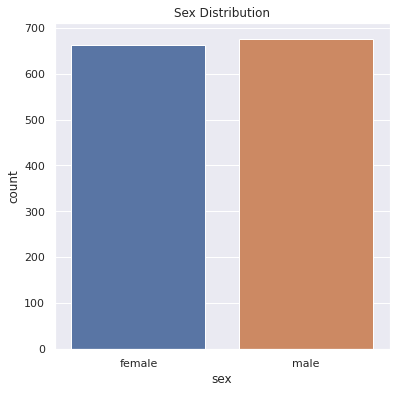

In [ ]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

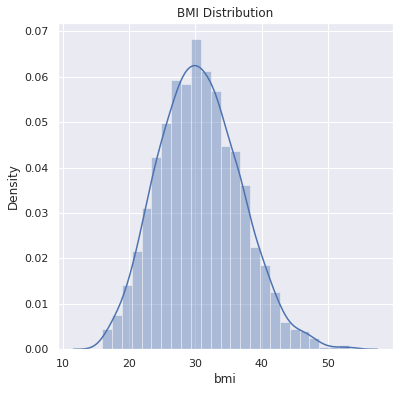

In [ ]:
#Distribution of BMI
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range ---> 18.5 to 24.9

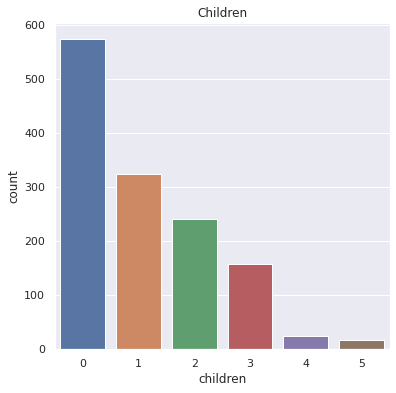

In [ ]:
# Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

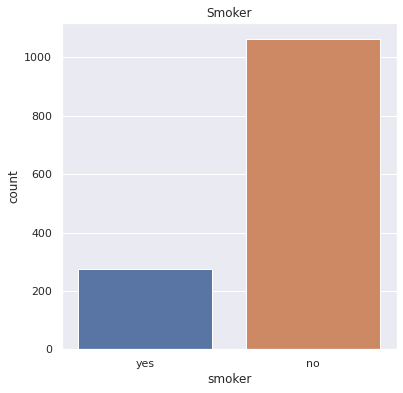

In [ ]:
# Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

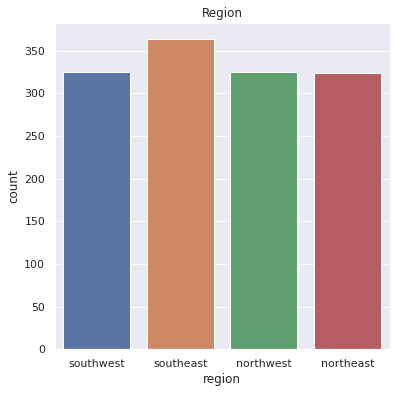

In [ ]:
# region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

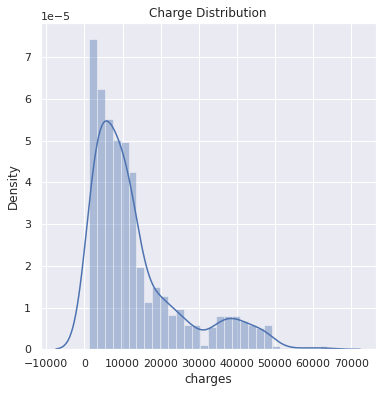

In [ ]:
#Distribution of Charges Value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

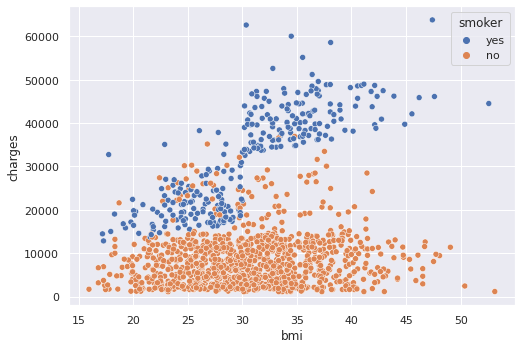

In [ ]:
#Scatterplor Visualization
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = insurance_dataset)

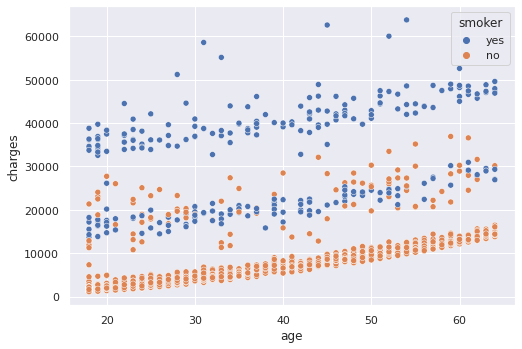

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = insurance_dataset)

Data Pre-Processing

Data Encoding

In [ ]:
#Encoding Sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)

#Encoding Smoker column
insurance_dataset.replace({'smoker':{'yes':1, 'no':0}},inplace = True)

#Encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le_sex = LabelEncoder()
# le_smoker = LabelEncoder()
# le_region = LabelEncoder()

In [ ]:
# insurance_dataset['sex_n']=le_sex.fit_transform(insurance_dataset['sex'])
# insurance_dataset['smoker_n']=le_smoker.fit_transform(insurance_dataset['smoker'])
# insurance_dataset['region_n']=le_region.fit_transform(insurance_dataset['region'])

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Splitting Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges',axis=1)
# X = insurance_dataset.drop(columns=['charges','sex','smoker','region'],axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [ ]:
LR_model = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()


In [ ]:
LR_model.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
y_pred1 = LR_model.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = rf.predict(X_test)

df1 = pd.DataFrame({'Actual':Y_test,'LR':y_pred1,'DT':y_pred2,'RF':y_pred3})

In [ ]:
df1

,Actual,LR,DT,RF
764,9095.06825,8597.284895,7518.02535,9911.619641
887,5272.17580,7231.743882,5469.00660,5700.249896
890,29330.98315,37039.232090,28950.46920,28363.115768
1293,9301.89355,9616.212129,9500.57305,11780.343112
259,33750.29180,27161.155047,33732.68670,34598.740888
...,...,...,...,...
109,47055.53210,39017.518638,46889.26120,47233.191198
575,12222.89830,11922.482922,11073.17600,12218.890023
535,6067.12675,7316.166925,6555.07035,6209.887453
543,63770.42801,40853.403071,47269.85400,46896.333704


Comparing Models Virtually

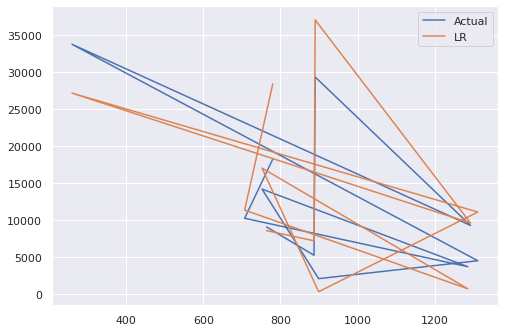

In [ ]:
#comparing Actual with Linear Regresion Model Value
plt.rcParams["figure.figsize"] = (8,5.5)
# plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['LR'].iloc[0:11],label = 'LR')
plt.legend()

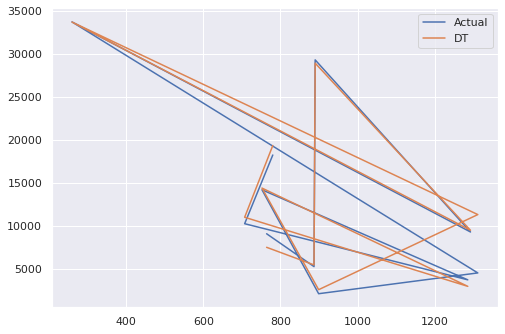

In [ ]:
#comparing Actual with SVM Model Value
plt.rcParams["figure.figsize"] = (8,5.5)
# plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['DT'].iloc[0:11],label = 'DT')
plt.legend()

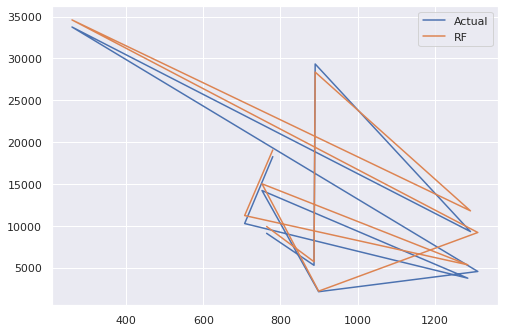

In [ ]:
#comparing Actual with RandomForestRegressor Model Value
plt.rcParams["figure.figsize"] = (8,5.5)
# plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['RF'].iloc[0:11],label = 'RF')
plt.legend()

Evaluating Models

In [ ]:
Lr_Score = metrics.r2_score(Y_test,y_pred1)
dt_Score = metrics.r2_score(Y_test,y_pred2)
rf_Score = metrics.r2_score(Y_test,y_pred3)


In [ ]:
score_df = pd.DataFrame({'LR_Score':[Lr_Score],'DT_Score':[dt_Score],'RF_Score':[rf_Score]})
score_df 

,LR_Score,DT_Score,RF_Score
0,0.783022,0.715614,0.868445


Here we can see that **RandomForestRegressor** Model has very good accuracy of **86.85%** as compared to Linear Regression model and Decision Tree model.

Predict Charge for new customers

In [ ]:
data = ({'age':40,'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2})
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [ ]:
new_pred = rf.predict(df)
new_pred

array([43991.0913924])

Make pickle file of our Model

In [ ]:
pickle.dump(rf, open("rf_tuned.pkl", "wb"))

In [ ]:
a=pickle.load(open("rf_tuned.pkl", "rb"))

In [ ]:
a.predict(df)

array([43991.0913924])